In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel(r'train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.shape

(10683, 11)

In [8]:
df_unique=df['Airline'].unique()
df_unique

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [9]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(10682, 11)

In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Visualization

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

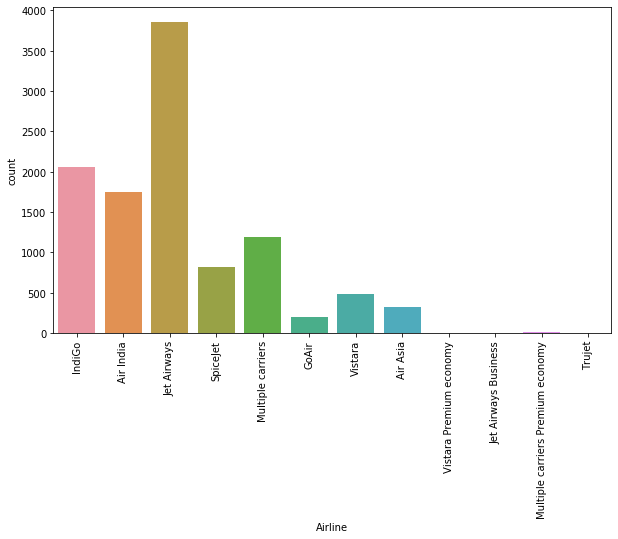

In [13]:
plt.figure(figsize=(10,6))
chart=sns.countplot(x='Airline',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

#### so in this dataset "jet Airways" comes most of the time and the last 4 Airline ('Vistara Premium economy' , 'Jet Airways Business' , 'Multiple carriers Premium economy' & 'Trujet') comes almost nothing

### Flight Vs Price

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

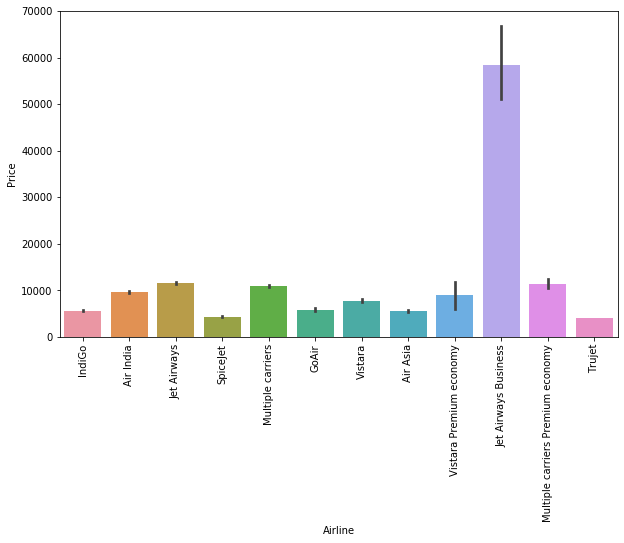

In [14]:
plt.figure(figsize=(10,6))
chart=sns.barplot(x='Airline',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Total Stops Vs Airline

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

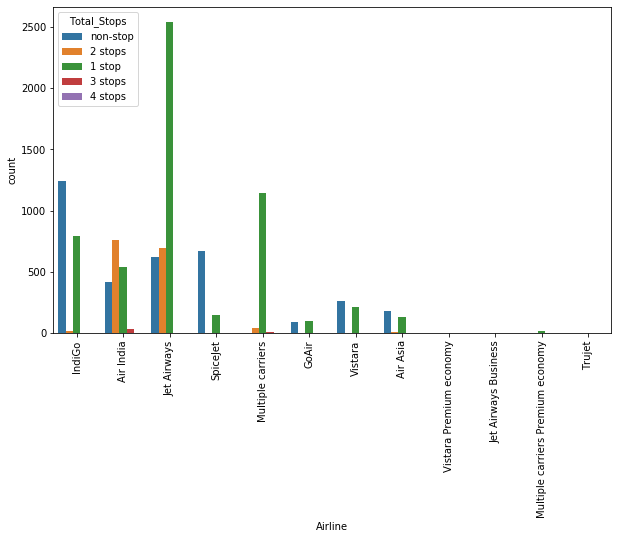

In [15]:
plt.figure(figsize=(10,6))
chart=sns.countplot(x='Airline',hue='Total_Stops',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

#### As we can see most of the flight are traveled Non stop and One stop

#### the data type of date_of_journey is object as we can see in info.so we will convert it into teimestamp.

In [16]:
df['jou_day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['jou_mon'] = pd.DatetimeIndex(df['Date_of_Journey']).month

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

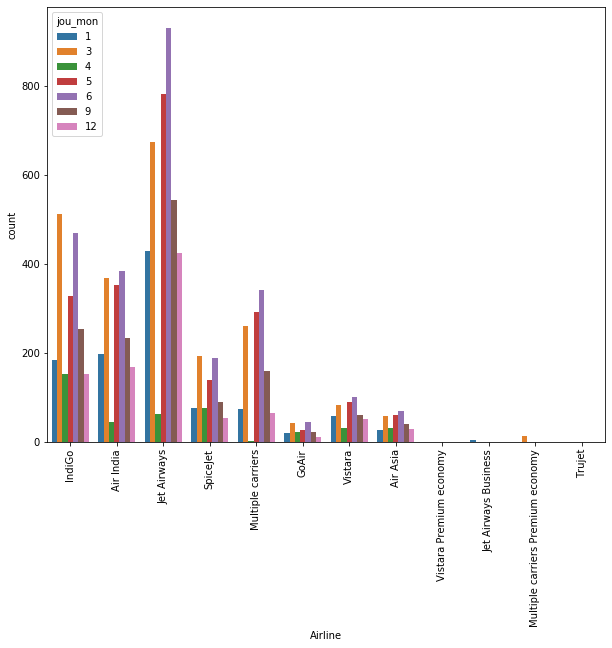

In [17]:
plt.figure(figsize=(10,8))
chart=sns.countplot(x='Airline',hue='jou_mon',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

#### Almost every Flight has least operation in the month of April and maximum in march & june

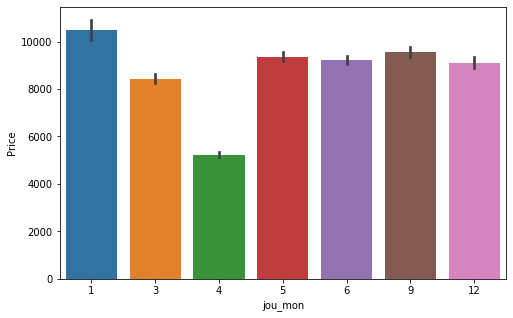

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='jou_mon',y='Price',data=df)

### lets handle catrgorical features

In [19]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [20]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
airline=pd.get_dummies(df['Airline'])

In [23]:
airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
airline.drop(['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet'],axis=1,inplace=True)

In [25]:
airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [26]:
source=pd.get_dummies(df['Source'])

In [27]:
source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [28]:
df['Destination']=df['Destination'].replace({'New Delhi':'Delhi'})

In [29]:
destination=pd.get_dummies(df['Destination'])

In [30]:
destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [31]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
def stops(x):
    if x=='non-stop':
        return 0
    elif x=='1 stop':
        return 1
    elif x=='2 stops':
        return 2
    elif x=='3 stops':
        return 3
    else:
        return 4

In [33]:
df['Total_Stops']=df['Total_Stops'].apply(stops)

In [34]:
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour

In [35]:
df['dep_minute']=pd.to_datetime(df.Dep_Time).dt.minute

In [36]:
df=pd.concat([df,airline,source,destination],axis=1)

In [37]:
df.drop(['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info','Date_of_Journey'],axis=1,inplace=True)

In [38]:
df.head()

,Total_Stops,Price,jou_day,jou_mon,dep_hour,dep_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,13882,6,9,9,25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,5,12,18,5,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,13302,3,1,16,50,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)

## KNeighborsRegressor

In [41]:
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train,y_train)
y_pred=knr.predict(X_test)

In [42]:
score=r2_score(y_test,y_pred)
score

0.6067363969307055

## RandomForestRegressor

In [54]:
regressor=RandomForestRegressor(n_estimators = 200, random_state = 15)
regressor.fit(X_train,y_train)
y_Pred=regressor.predict(X_test)

In [55]:
import pickle
file='Extract_For_Pickle_File.pkl'
pickle.dump(regressor,open(file,'wb'))